```{admonition} Lecture Materials
:class: tip
[Download the slide deck for this lecture](/_static/pdf/Lecture7-NonlinearEquations-2.pdf)
```

In [2]:
# preliminaries
import numpy as np

import matplotlib.pyplot as plt
# Default style parameters (feel free to modify as you see fit)
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

# Systems of non-linear equations

## General form

The general form of a system of $N$ non-linear equations is

$$
f_1(x_1,\ldots,x_N) = 0,\\
f_2(x_1,\ldots,x_N) = 0,\\
\ldots \\
f_N(x_1,\ldots,x_N) = 0
$$

Denoting ${\bf f} = (f_1,\ldots,f_N)$ and ${\bf x} = (x_1,\ldots,x_N)$ this can be written in compact form using vector notation

$$
{\bf f}({\bf x}) = 0~.
$$


As an example of a system of non-linear equations consider the intersection point (x,y) of functions $y = x + \exp(-x) - 2$ and $y = x^3 - x - 3$. This can be cast as a solution to a system of two non-linear equations

$$
x + \exp(-x) - 2 - y = 0,\\
x^3 - x - 3 - y = 0.
$$

This implies $(x,y) = (x_1,x_2)$, 

$$
f_1(x_1,x_2) = x_1 + \exp(-x_1) - 2 - x_2
$$ 

and 

$$
f_2(x_1,x_2) = x_1^3 - x_1 - 3 - x_2.
$$

For illustration, let us cast these equations in a form

\begin{align*}
x_2 &= \tilde f_1(x_1)\\
x_2 &= \tilde f_2(x_1)
\end{align*}

where $\tilde f_1(x_1) = x_1 + \exp(-x_1) - 2$ and $\tilde f_2(x_1) = x_1^3 - x_1 - 3$.

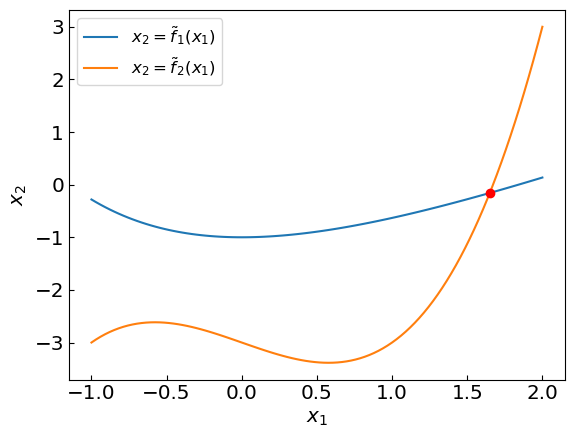

In [7]:
import numpy as np

def y1f(x):
    return x + np.exp(-x) - 2.

def y2f(x):
    return x**3 - x - 3.

xref = np.linspace(-1,2,100)
y1ref = y1f(xref)
y2ref = y2f(xref)

plt.xlabel("${x_1}$")
plt.ylabel("${x_2}$")
plt.plot(xref,y1ref,label = '$x_2 = {\\tilde f_1(x_1)}$')
plt.plot(xref,y2ref,label = '$x_2 = {\\tilde f_2(x_1)}$')
plt.plot([1.64998819 ], [-0.15795963], 'ro')
plt.legend()
plt.show()

Let us implement a vector function $\mathbf{f}(\mathbf{x})$.

In addition, we can also introduce a scalar-valued *objective function*

$$
\tilde{f}(\mathbf{x}) = \frac{\mathbf{f}(\mathbf{x}) \cdot \mathbf{f}(\mathbf{x})}{2}
$$

which is equal to zero at the root.
Finding roots is thus similar to minimizing this function

In [11]:
def f(x):
    return np.array([x[0] + np.exp(-x[0]) - 2. - x[1], x[0]**3 - x[0] - 3 - x[1]])

def ftil(f):
    return np.dot(f,f) / 2.

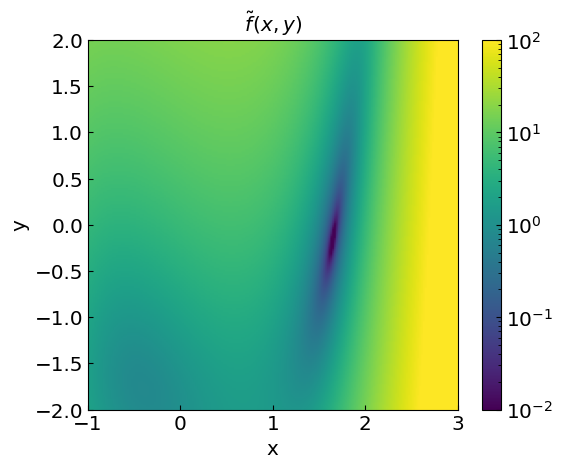

In [9]:
from matplotlib import colors, cm, pyplot as plt

xplot = np.linspace(-1,3,200)
yplot = np.linspace(-2,2,200)

X, Y = np.meshgrid(xplot, yplot)


fdat = []
for yin in yplot:
    ftmp = []
    for xin in xplot:
        ftmp.append(ftil(f([xin,yin])))
    fdat.append(ftmp)

funclabel = "${\\tilde f(x,y)}$"

#plt.contourf(X, Y, Vdip, 10)
plt.title(funclabel)
plt.xlabel("x")
plt.ylabel("y")
norm = colors.LogNorm(0.01, 100., clip='True') # log scale
CS = plt.imshow(fdat, origin="lower",extent=[-1,3,-2,2], aspect=1, norm = norm)
#CS = plt.imshow(fdat, vmax=5, vmin=0.,origin="lower",extent=[-1,3,-2,2], aspect=1)
#plt.plot([0],[0],'r.')
plt.colorbar(CS)
plt.show()

Newton-Raphson method can be readily generalized to multi-dimensional systems of equations.
There is also a multi-dimensional version of the secant method called Broyden's method.

Let us explore these methods

## Newton method

Recall the Taylor expansion of a function $f$ around the root $x^*$ in one-dimensional case:

$$
f(x^*) \approx f(x) + f'(x) (x^* - x)
$$

The multi-dimensional version of this expansion reads

$$
{\bf f} ({\bf x^*}) \approx {\bf f}({\bf x}) + J(\bf{x}) ({\bf x^*} - {\bf x})
$$

Here $J(\mathbf{x})$ is the Jacobian, i.e. a $N \times N$ matrix of derivatives evaluated at $\bf{x}$

$$
J_{ij}(\mathbf{x}) = \frac{\partial f_i}{\partial x_j}~.
$$

Given that $\mathbf{f}(\mathbf{x^*}) = 0$, we have

$$
J(\mathbf{x}) (\mathbf{x^*} - \mathbf{x}) \approx -\mathbf{f}(\mathbf{x}),
$$

which is a system of linear equations for $\mathbf{x^*} - \mathbf{x}$.
Solving this system yields

$$
\mathbf{x^*} \approx \mathbf{x} - J^{-1}(\mathbf{x}) \, \mathbf{f}(\mathbf{x})~.
$$

Here $J^{-1}(\mathbf{x})$ is the inverse Jacobian matrix.

The multi-dimensional Newton's method is an iterative procedure

$$
\mathbf{x_{n+1}} = \mathbf{x_n} - J^{-1}(\mathbf{x_n}) \, \mathbf{f}(\mathbf{x_n})~.
$$

In [40]:
import numpy as np

last_newton_iterations = 0
newton_verbose = True

def newton_method_multi(
    f, 
    jacobian, 
    x0, 
    accuracy=1e-8, 
    max_iterations=100):
    x = x0
    global last_newton_iterations
    last_newton_iterations = 0
    
    if newton_verbose:
        print("Iteration: ", last_newton_iterations)
        print("x = ", x0)
        print("f = ", f(x0))
        print("|f| = ", ftil(f(x0)))
        
    for i in range(max_iterations):
        last_newton_iterations += 1
        f_val = f(x)
        jac = jacobian(x)
        jinv = np.linalg.inv(jac)
        delta = np.dot(jinv, -f_val)
        x = x + delta
        
        if newton_verbose:
            print("Iteration: ", last_newton_iterations)
            print("x = ", x)
            print("f = ", f(x))
            print("|f| = ", ftil(f(x)))
            
        if np.linalg.norm(delta, ord=2) < accuracy:
            return x
    return x

Let us perform the calculation for our example

Iteration:  0
x =  [0. 0.]
f =  [-1. -3.]
|f| =  5.0
Iteration:  1
x =  [-2. -1.]
f =  [ 4.3890561 -8.       ]
|f| =  41.63190671978017
Iteration:  2
x =  [-1.28753717 -1.16290888]
f =  [ 1.49922234 -2.68397122]
|f| =  4.725684585141539
Iteration:  3
x =  [-0.65344197 -1.32745762]
f =  [ 0.59616108 -1.29811125]
|f| =  1.0202504224353612
Iteration:  4
x =  [ 0.92104475 -2.18320228]
f =  [ 1.50234993 -0.95649863]
|f| =  1.5859724775723376
Iteration:  5
x =  [3.52831703 0.88845726]
f =  [ 0.66921404 36.50731858]
|f| =  666.6160786805304
Iteration:  6
x =  [2.51526632 0.57435797]
f =  [0.02174973 9.82337075]
|f| =  48.249542955733645
Iteration:  7
x =  [1.94074619 0.06803257]
f =  [0.01631038 2.30103357]
|f| =  2.647510761586109
Iteration:  8
x =  [ 1.69879947 -0.122861  ]
f =  [0.00456345 0.32666032]
|f| =  0.053363893975197814
Iteration:  9
x =  [ 1.65171385 -0.15677108]
f =  [0.00020597 0.01119461]
|f| =  6.268087547408287e-05
Iteration:  10
x =  [ 1.64999046 -0.15795808]
f =  [2.848745

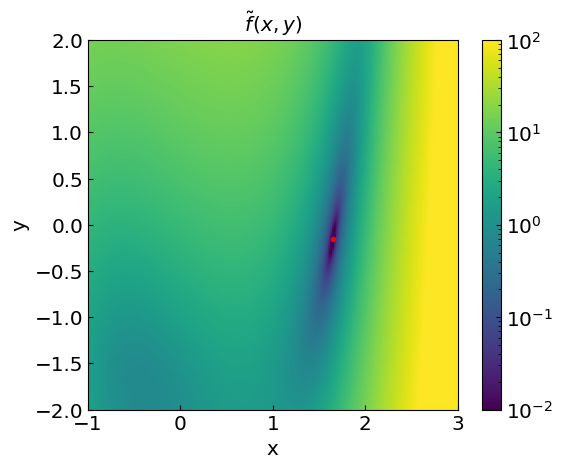

CPU times: user 556 ms, sys: 16.9 ms, total: 572 ms
Wall time: 223 ms


In [ ]:
%%time

def f(x):
    return np.array([x[0] + np.exp(-x[0]) - 2. - x[1], x[0]**3 - x[0] - 3 - x[1]])

def jacobian(x):
    return np.array([[1. - np.exp(-x[0]), -1.], [3*x[0]**2 - 1., -1]])

x0 = np.array([0., 0.])
root = newton_method_multi(f, jacobian, x0)

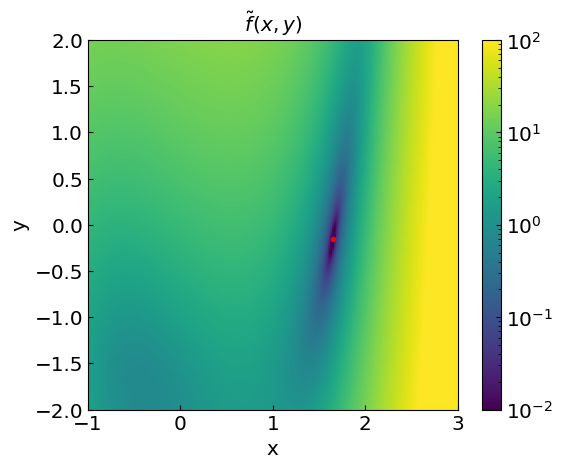

In [ ]:
# plotting

xplot = np.linspace(-1,3,200)
yplot = np.linspace(-2,2,200)
fdat = []
for yin in yplot:
    ftmp = []
    for xin in xplot:
        ftmp.append(ftil(f([xin,yin])))
    fdat.append(ftmp)

funclabel = "${\\tilde f(x,y)}$"

#plt.contourf(X, Y, Vdip, 10)
plt.title(funclabel)
plt.xlabel("x")
plt.ylabel("y")
norm = colors.LogNorm(0.01, 100., clip='True') # log scale
CS = plt.imshow(fdat, origin="lower",extent=[-1,3,-2,2], aspect=1, norm = norm)
#CS = plt.imshow(fdat, vmax=5, vmin=0.,origin="lower",extent=[-1,3,-2,2], aspect=1)
plt.plot([root[0]],[root[1]],'r.')
plt.colorbar(CS)
plt.show()

The method converged to the root in 12 iterations.
The properties of multivariate Newton method are similar to the univariate case.
There are a couple of drawbacks:
- The Jacobian matrix must be computed at each iteration
- The inversion of the Jacobian matrix is required at each iteration

Both operations can be expensive for large systems.


## Broyden method

Broyden method is a generalization of the secant method to multiple dimensions.
It is a quasi-Newton method that approximates the Jacobian by finite differences (see lecture notes). 
With each iteration, it updates the Jacobian approximation using the secant update rule.
The method can also be adjusted to directly update the inverse of the Jacobian, avoiding the need to invert the Jacobian at each iteration.


### Secant Method (1D)
The secant method for a single variable function approximates the derivative using:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

where the derivative is approximated by:

$$f'(x_n) \approx \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}$$

### Broyden's Method (Multi-dimensional)
Broyden's method extends this concept to vector functions:

$$\mathbf{x}_{n+1} = \mathbf{x}_n - J^{-1}(\mathbf{x}_n)\mathbf{f}(\mathbf{x}_n)$$

where the Jacobian approximation satisfies:

$$J(\mathbf{x}_n)(\mathbf{x}_n - \mathbf{x}_{n-1}) \approx \mathbf{f}(\mathbf{x}_n) - \mathbf{f}(\mathbf{x}_{n-1})$$

### Jacobian Update

The key insight of Broyden's method is how it updates the Jacobian approximation. Rather than recalculating the entire Jacobian matrix at each step (which would be computationally expensive), Broyden's method uses a rank-one update:

$$J_n = J_{n-1} + \frac{\Delta \mathbf{f}_n - J_{n-1}\Delta \mathbf{x}_n}{\|\Delta \mathbf{x}_n\|^2}\Delta \mathbf{x}_n^T$$

Where:
- $\Delta \mathbf{x}_n = \mathbf{x}_n - \mathbf{x}_{n-1}$ (the step in x)
- $\Delta \mathbf{f}_n = \mathbf{f}_n - \mathbf{f}_{n-1}$ (the change in function values)
- $J_n$ is the approximation of the Jacobian at step n

This update formula ensures that the new Jacobian approximation $J_n$ satisfies the secant equation:

$$J_n \Delta \mathbf{x}_n = \Delta \mathbf{f}_n$$

### Initial Jacobian

For the initial Jacobian $J_0$, there are two common approaches:

1. **Calculate the exact Jacobian** at the initial point $J(\mathbf{x}_0)$ - This requires derivatives but provides more accurate initial steps and potentially faster convergence.

2. **Initialize with the identity matrix** $J(\mathbf{x}_0) = I$ - This requires no derivative calculations but may converge more slowly.

### Algorithm Steps

1. Choose an initial guess $\mathbf{x}_0$ and initialize the Jacobian $J_0$ (either by calculation or using the identity matrix)
2. For each iteration until convergence:
   - Compute $\mathbf{f}(\mathbf{x}_n)$
   - Update $\mathbf{x}_{n+1} = \mathbf{x}_n - J^{-1}(\mathbf{x}_n)\mathbf{f}(\mathbf{x}_n)$
   - Compute $\Delta \mathbf{x}_n = \mathbf{x}_{n+1} - \mathbf{x}_n$ and $\Delta \mathbf{f}_n = \mathbf{f}(\mathbf{x}_{n+1}) - \mathbf{f}(\mathbf{x}_n)$
   - Update the Jacobian using the Broyden formula
   - Check for convergence

### Advantages and Limitations

Advantages:
- Requires only one Jacobian evaluation (or none if using identity matrix initialization)
- Converges superlinearly under appropriate conditions
- Significantly reduces computational cost compared to Newton's method for large systems

Limitations:
- The solution for $J(\mathbf{x}_n)$ is not unique
- Convergence is typically slower than Newton's method
- The direct version of the method requires matrix inversion at each step

In [20]:
import numpy as np

last_broyden_iterations = 0
broyden_verbose = True

# Implementation of direct Broyden's method 
# (performs matrix inversion at each step)
def broyden_method_direct(
    f, 
    x0, 
    jacobian=None,
    accuracy=1e-8, 
    max_iterations=100):
    global last_broyden_iterations
    last_broyden_iterations = 0
    x = x0
    n = x0.shape[0]
    if jacobian is None:
        J = np.eye(n)
    else:
        J = jacobian(x)
    
        
    for i in range(max_iterations):
        last_broyden_iterations += 1
        f_val = f(x)
        Jinv = np.linalg.inv(J)
        delta = np.dot(Jinv, -f_val)
        x = x + delta
        if np.linalg.norm(delta, ord=2) < accuracy:
            return x
        f_new = f(x)
        u = f_new - f_val
        v = delta
        J = J + np.outer(u - J.dot(v), v) / np.dot(v, v)
            
    return x

Let us apply the direct Broyden's method to the same system of equations as in the previous example.

First we do not compute the initial Jacobian, but initialize it to the identity matrix.

In [32]:
%%time

x0 = np.array([0., 0.])
root = broyden_method_direct(f, x0, jacobian=None)  # By providing None as the jacobian, we initialize it to the identity matrix
print("Number of iterations: ", last_broyden_iterations)
print("Root: ", root)

Number of iterations:  55
Root:  [ 1.64998819 -0.15795963]
CPU times: user 5.27 ms, sys: 2.2 ms, total: 7.47 ms
Wall time: 3.14 ms


The method converged to the root, but it took 55 iterations to reach the desired accuracy compared to 12 iterations for the Newton method.

Let us apply the method where we compute the initial Jacobian and its inverse explicitly. 

In [33]:
%%time

x0 = np.array([0., 0.])
root = broyden_method_direct(f, x0, jacobian=jacobian) # By providing the jacobian, we compute it in the first iteration explicitly
print("Number of iterations: ", last_broyden_iterations)
print("Root: ", root)

Number of iterations:  16
Root:  [ 1.64998819 -0.15795963]
CPU times: user 2.14 ms, sys: 694 μs, total: 2.83 ms
Wall time: 1.31 ms


Now the method has converged much faster.

## Avoiding Matrix Inversion in Broyden's Method

One of the key implementation considerations in Broyden's method is to avoid explicitly computing the inverse of the Jacobian matrix. The [Sherman-Morrison formula](https://en.wikipedia.org/wiki/Sherman%E2%80%93Morrison_formula) provides a solution to this problem by directly updating the inverse Jacobian.

Instead of computing $J_n$ and then inverting it, we can directly update the inverse Jacobian $J_n^{-1}$ using the Sherman-Morrison formula:

$$J_n^{-1} = J_{n-1}^{-1} + \frac{\Delta \mathbf{x}_n - J_{n-1}^{-1}\Delta \mathbf{f}_n}{\Delta \mathbf{x}_n^T J_{n-1}^{-1} \Delta \mathbf{f}_n}\Delta \mathbf{x}_n^T J_{n-1}^{-1}$$

This formula allows us to update the inverse Jacobian directly, avoiding the computationally expensive matrix inversion operation at each iteration.
This improves the efficiency of the algorithm by reducing the number of operations required to compute the inverse Jacobian: instead of $O(n^3)$ operations for matrix inversion, we only need $O(n^2)$ operations for the Sherman-Morrison update.

This results in the following implementation of the full Broyden's method:

In [29]:
import numpy as np

last_broyden_iterations = 0
broyden_verbose = True


# Implementation of Broyden's method using Sherman-Morrison formula
def broyden_method(
    f, 
    x0, 
    jacobian=None,
    accuracy=1e-8, 
    max_iterations=100):
    global last_broyden_iterations
    last_broyden_iterations = 0
    x = x0
    n = x0.shape[0]
    if jacobian is None:
        Jinv = np.eye(n)
    else:
        Jinv = np.linalg.inv(jacobian(x))
    
    if broyden_verbose:
        print("Iteration: ", last_broyden_iterations)
        print("x = ", x0)
        print("f = ", f(x0))
        print("|f| = ", ftil(f(x0)))
        
    for i in range(max_iterations):
        last_broyden_iterations += 1
        f_val = f(x)
        delta = -Jinv.dot(f_val)
        x = x + delta
        if np.linalg.norm(delta, ord=2) < accuracy:
            return x
        f_new = f(x)
        df = f_new - f_val
        dx = delta
        Jinv = Jinv + np.outer(dx - Jinv.dot(df), dx.T.dot(Jinv)) / np.dot(dx.T, Jinv.dot(df))
        
        if broyden_verbose:
            print("Iteration: ", last_broyden_iterations)
            print("x = ", x)
            print("f = ", f(x))
            print("|f| = ", ftil(f(x)))
            
    return x

In [38]:
%%time

x0 = np.array([0., 0.])
broyden_verbose = False
root = broyden_method(f, x0, jacobian=None, accuracy=1.e-8, max_iterations=5000)
print("Number of iterations: ", last_broyden_iterations)
print("Root: ", root)

Number of iterations:  55
Root:  [ 1.64998819 -0.15795963]
CPU times: user 2.95 ms, sys: 3.84 ms, total: 6.79 ms
Wall time: 4.19 ms


The method took the same number of iterations as the previous one, but avoiding matrix inversion made it considerably faster.

Similarly, we can specify the Jacobian explicitly to have faster convergence.

In [39]:
%%time

x0 = np.array([0., 0.])
broyden_verbose = False
root = broyden_method(f, x0, jacobian=jacobian, accuracy=1.e-8, max_iterations=5000)
print("Number of iterations: ", last_broyden_iterations)
print("Root: ", root)

Number of iterations:  16
Root:  [ 1.64998819 -0.15795963]
CPU times: user 2.08 ms, sys: 845 μs, total: 2.92 ms
Wall time: 1.27 ms
